# Text Analysis and clustering

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
df = pd.read_csv("amazon_baby.csv")
df

name  \
0                                Planetwise Flannel Wipes   
1                                   Planetwise Wipe Pouch   
2                     Annas Dream Full Quilt with 2 Shams   
3       Stop Pacifier Sucking without tears with Thumb...   
4       Stop Pacifier Sucking without tears with Thumb...   
...                                                   ...   
183526  Baby Teething Necklace for Mom Pretty Donut Sh...   
183527  Baby Teething Necklace for Mom Pretty Donut Sh...   
183528   Abstract 2 PK Baby / Toddler Training Cup (Pink)   
183529  Baby Food Freezer Tray - Bacteria Resistant, B...   
183530  Best 2 Pack Baby Car Shade for Kids - Window S...   

                                                   review  rating  
0       These flannel wipes are OK, but in my opinion ...       3  
1       it came early and was not disappointed. i love...       5  
2       Very soft and comfortable and warmer than it l...       5  
3       This is a product well worth the purchase.  I ...       5  
4       All of my kids have cried non-stop when I trie...       5  
...                                                   ...     ...  
183526  Such a great idea! very handy to have and look...       5  
183527  This product rocks!  It is a great blend of fu...       5  
183528  This item looks great and cool for my kids.......       5  
183529  I am extremely happy with this product. I have...       5  
183530  I love this product very mush . I have bought ...       5  

[183531 rows x 3 columns]

In [76]:
import plotly as py
import cufflinks as cf
%matplotlib inline

In [73]:
from plotly.offline import iplot
import plotly.graph_objs as go

In [74]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

#### 1. Check the number of the reviews received for each product.

In [48]:
num_reviews = df.groupby("name").agg({"review": lambda x: x.count()})
num_reviews.sort_values(by="review")

review
name                                                      
Wonderworld My Dachshund                                 0
Graco Benton 5-in-1 Convertible Fixed-Side Crib...       0
Bright Starts Cuddle and Soothe Teether Blanket          0
Cloud b 7303-ZZ Sleep Sheep Four Soothing Sound...       0
4 Piece Kimono Gift Set in Pastel                        0
...                                                    ...
Cloud b Twilight Constellation Night Light, Turtle     517
Baby Einstein Take Along Tunes                         545
Infant Optics DXR-5 2.4 GHz Digital Video Baby ...     558
Simple Wishes Hands-Free Breastpump Bra, Pink, ...     560
Vulli Sophie the Giraffe Teether                       779

[32417 rows x 1 columns]

#### 2. Check the products that have more than 15 reviews.

In [49]:
num_reviews_dec = num_reviews[num_reviews["review"]<=15].sort_values(by="review")
review_prod = num_reviews_dec.index.tolist()

In [57]:
df = df[~(df["name"].isin (review_prod))]
df

name  \
153                  Fisher Price Nesting Action Vehicles   
154                  Fisher Price Nesting Action Vehicles   
155                  Fisher Price Nesting Action Vehicles   
156                  Fisher Price Nesting Action Vehicles   
157                  Fisher Price Nesting Action Vehicles   
...                                                   ...   
183511  Maxboost iPhone 5S/5 Case - Protective Snap-on...   
183512  Maxboost iPhone 5S/5 Case - Protective Snap-on...   
183513  Maxboost iPhone 5S/5 Case - Protective Snap-on...   
183514  Maxboost iPhone 5S/5 Case - Protective Snap-on...   
183515  Maxboost iPhone 5S/5 Case - Protective Snap-on...   

                                                   review  rating  
153     We bought these for our son when he turned two...       5  
154     My son loves stacking cups, so a friend recomm...       5  
155     My son Cameron just loves these great little s...       5  
156     My one year old son received these as a birthd...       5  
157     I purchased this toy for my great grandson\'s ...       5  
...                                                   ...     ...  
183511  I received a free sample from VIPU program for...       3  
183512  *I received a free sample from VIPU program fo...       5  
183513  I was a very surprised by the quality of this ...       5  
183514  I received a free sample from VIPU program for...       4  
183515  I love this phone case!  My  iPhone is always ...       5  

[101016 rows x 3 columns]

#### 3. Find any missing review are present or not, If present remove those data.

In [58]:
df.isnull().sum()

name      318
review    441
rating      0
dtype: int64

In [64]:
df.dropna(subset=["name","review"],inplace = True)
df.isnull().sum()
# We can see that there are still misiing Product Names, which can be removed

<ipython-input-64-d1d6ea7b1a2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["name","review"],inplace = True)


name      0
review    0
rating    0
dtype: int64

#### 4. Clean the data and remove the special characters and replace the contractions with its expansion by converting the uppercase character to lower case. Also, remove the punctuations

In [60]:
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

In [61]:
def cont_to_exp(x):
    if type(x) is str:
        x = re.sub(r"[^a-zA-Z0-9\.\']+", ' ', x)
        x = x.lower()
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [62]:
df["review"] = df["review"].apply(lambda x: cont_to_exp(x))

<ipython-input-62-5b94a415af27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["review"].apply(lambda x: cont_to_exp(x))


In [63]:
df

name  \
153                  Fisher Price Nesting Action Vehicles   
154                  Fisher Price Nesting Action Vehicles   
155                  Fisher Price Nesting Action Vehicles   
156                  Fisher Price Nesting Action Vehicles   
157                  Fisher Price Nesting Action Vehicles   
...                                                   ...   
183511  Maxboost iPhone 5S/5 Case - Protective Snap-on...   
183512  Maxboost iPhone 5S/5 Case - Protective Snap-on...   
183513  Maxboost iPhone 5S/5 Case - Protective Snap-on...   
183514  Maxboost iPhone 5S/5 Case - Protective Snap-on...   
183515  Maxboost iPhone 5S/5 Case - Protective Snap-on...   

                                                   review  rating  
153     we bought these for our son when he turned two...       5  
154     my son loves stacking cups so a friend recomme...       5  
155     my son cameron just loves these great little s...       5  
156     my one year old son received these as a birthd...       5  
157     i purchased this toy for my great grandson 's ...       5  
...                                                   ...     ...  
183511  i received a free sample from vipu program for...       3  
183512   i received a free sample from vipu program fo...       5  
183513  i was a very surprised by the quality of this ...       5  
183514  i received a free sample from vipu program for...       4  
183515  i love this phone case my iphone is always sli...       5  

[100257 rows x 3 columns]

In [ ]:
' '.join(df["review"].tolist())
    

#### 5. Add the Polarity, length of the review, the word count and average word length of each review.


In [65]:
from textblob import TextBlob

In [12]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

df['Polarity'] = df['review'].apply(lambda x: polarity_calc(x))

In [66]:
df['polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['review_len'] = df['review'].apply(lambda x:len(x))
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

<ipython-input-66-dfa04d3fb2a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
<ipython-input-66-dfa04d3fb2a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_len'] = df['review'].apply(lambda x:len(x))
<ipython-input-66-dfa04d3fb2a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

0         0.071429
1         0.367000
2         0.293333
3         0.318767
4         0.558333
            ...   
183526    0.546000
183527    0.436111
183528    0.650000
183529    0.379694
183530    0.250000
Name: Polarity, Length: 182384, dtype: float64

In [68]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words)

In [70]:
df["avg_word_len"] = df['review'].apply(lambda x: get_avg_word_len(x))

<ipython-input-70-6f17c22e1a79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["avg_word_len"] = df['review'].apply(lambda x: get_avg_word_len(x))


In [71]:
df

name  \
153                  Fisher Price Nesting Action Vehicles   
154                  Fisher Price Nesting Action Vehicles   
155                  Fisher Price Nesting Action Vehicles   
156                  Fisher Price Nesting Action Vehicles   
157                  Fisher Price Nesting Action Vehicles   
...                                                   ...   
183511  Maxboost iPhone 5S/5 Case - Protective Snap-on...   
183512  Maxboost iPhone 5S/5 Case - Protective Snap-on...   
183513  Maxboost iPhone 5S/5 Case - Protective Snap-on...   
183514  Maxboost iPhone 5S/5 Case - Protective Snap-on...   
183515  Maxboost iPhone 5S/5 Case - Protective Snap-on...   

                                                   review  rating  polarity  \
153     we bought these for our son when he turned two...       5  0.307000   
154     my son loves stacking cups so a friend recomme...       5  0.425000   
155     my son cameron just loves these great little s...       5  0.222593   
156     my one year old son received these as a birthd...       5  0.211000   
157     i purchased this toy for my great grandson 's ...       5  0.428571   
...                                                   ...     ...       ...   
183511  i received a free sample from vipu program for...       3  0.393750   
183512   i received a free sample from vipu program fo...       5  0.451429   
183513  i was a very surprised by the quality of this ...       5  0.307500   
183514  i received a free sample from vipu program for...       4  0.414286   
183515  i love this phone case my iphone is always sli...       5  0.200000   

        review_len  word_count  avg_word_len  
153            311          61      4.098361  
154            207          41      4.073171  
155            425          83      4.120482  
156            368          66      4.590909  
157            327          67      3.880597  
...            ...         ...           ...  
183511         166          31      4.387097  
183512         252          45      4.600000  
183513         109          22      3.954545  
183514         341          61      4.606557  
183515         119          24      3.958333  

[100257 rows x 7 columns]

#### 6. Visualize the distribution of the word count, review length, and polarity.

In [77]:
df['word_count'].iplot(
    kind='hist',
    xTitle='Word Count',
    yTitle='count',
    title='Review Word Count Distribution')

In [79]:
df['review_len'].iplot(
    bins=100,
    kind='hist',
    xTitle='Review Length',
    yTitle='count',
    title='Review Length Distribution')

In [83]:
df["polarity"].iplot(
    bins=100,
    kind= 'hist',
    xTitle="Polarity",
    yTitle="Count",
    color = 'blue',
    title="Sentiment Polarity Distribution")

#### 7. Visualize polarity considering the rating.

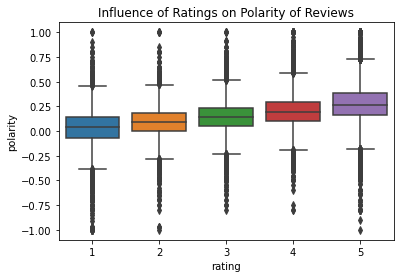

In [112]:
sns.boxplot(data=df,x="rating", y="polarity")
plt.title("Influence of Ratings on Polarity of Reviews")
plt.show()

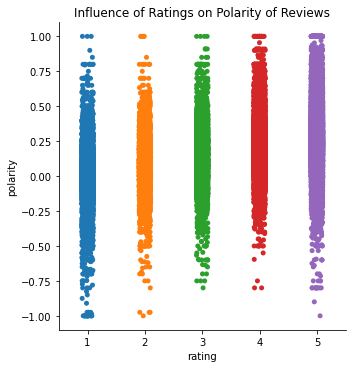

In [143]:
sns.catplot(data=df,x="rating", y="polarity")
plt.title("Influence of Ratings on Polarity of Reviews")
plt.show()

In [86]:
# We can infer that higher the Rating, more positive are the reviews

#### 8. Visualize the count of the reviews of each rating available in the dataset.

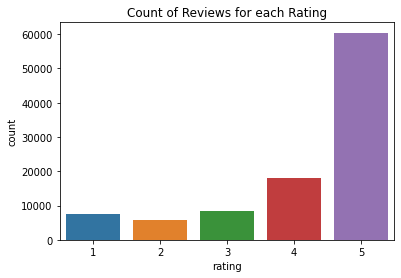

In [114]:
sns.countplot(data=df,x="rating")
plt.title("Count of Reviews for each Rating")
plt.show()

#### 9. List the Top 20 products based on the polarity

In [102]:
df.sort_values("polarity",ascending=False)["name"].head(20)

48203              The First Years Massaging Action Teether
21998                       Chicco Caddy Hook On Chair, Red
111196    bumGenius One-Size Snap Closure Cloth Diaper 4...
127341                         BOB Single Snack Tray, Black
150679             Britax 2 Pack EZ-Cling Sun Shades, Black
11710     Summer Infant  Multi Use Extra Tall Walk-Thru ...
76501                               Thermos Ice Mat, 9 Cube
161413    Levana Jena Digital Baby Video Monitor with 8 ...
115220                Skip Hop Treetop Friends Activity Gym
40946               KidCo Bath Toy Organizer Storage Basket
108089    Baby Einstein Musical Motion Activity Jumper, ...
28506     HALO SleepSack Big Kids Micro-Fleece Wearable ...
155663    Babiators Unisex-Baby Infant Ops Junior Sungla...
71910                 Sealy Soybean Foam-Core Crib Mattress
34867                      Vulli Sophie the Giraffe Teether
161486    Levana Jena Digital Baby Video Monitor with 8 ...
50158                 Fisher-Price Boost

#### 10. Visualize to check whether the review length changes with rating.

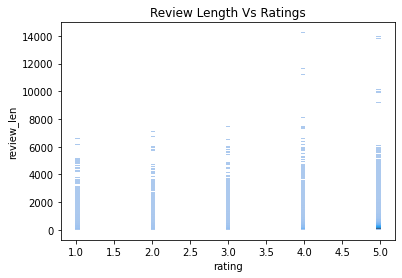

In [117]:
sns.histplot(data=df,x="rating", y="review_len")
plt.title("Review Length Vs Ratings")
plt.show()

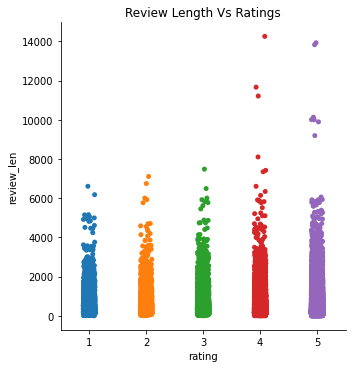

In [142]:
sns.catplot(data=df,x="rating", y="review_len")
plt.title("Review Length Vs Ratings")
plt.show()

#### 11. Visualize the distribution of Top 25 Unigram, Bigram and Trigram.


In [121]:
from sklearn.feature_extraction.text import CountVectorizer

In [122]:
def get_top_n_words(x, n=None):
    vec = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [132]:
common_words = get_top_n_words(df['review'], 25)
df1 = pd.DataFrame(common_words, columns = ['Unigram Text' , 'Count'])
df1

Unigram Text  Count
0          baby  45844
1         great  33962
2          just  32495
3           use  31801
4          like  28339
5          seat  27424
6          easy  25329
7          love  24034
8           old  23595
9        little  23185
10         time  20305
11      product  19715
12       really  19525
13          son  19112
14       bought  17726
15         good  16596
16       months  16489
17          don  16078
18     daughter  15777
19          car  14372
20         used  14127
21        loves  13314
22    recommend  12214
23        using  11624
24     stroller  11477

In [138]:
df1.groupby('Unigram Text').sum()['Count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 25 words in Review')

In [125]:
def get_top_n_bigram(x, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [134]:
common_words = get_top_n_bigram(df['review'], 25)
df2 = pd.DataFrame(common_words, columns = ['Bigram Text' , 'Count'])
df2

Bigram Text  Count
0               car seat   7422
1              month old   7276
2               year old   5812
3             months old   4382
4       highly recommend   3745
5             easy clean   3189
6               easy use   3158
7            works great   2508
8          great product   2307
9             diaper bag   2224
10          easy install   1902
11             make sure   1753
12             son loves   1706
13            high chair   1661
14               old son   1656
15        daughter loves   1599
16           really like   1598
17     recommend product   1454
18              don know   1397
19             pack play   1388
20          old daughter   1320
21  definitely recommend   1310
22             old loves   1298
23             car seats   1257
24      customer service   1251

In [139]:
df2.groupby('Bigram Text').sum()['Count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 25 bigrams in Review')

In [128]:
def get_top_n_trigram(x, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words="english").fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [136]:
common_words = get_top_n_trigram(df['review'], 25)
df3 = pd.DataFrame(common_words, columns = ['Trigram Text' , 'Count'])
df3

Trigram Text  Count
0              month old son    889
1         month old daughter    687
2             son months old    576
3            month old loves    541
4   highly recommend product    497
5               year old son    495
6        daughter months old    441
7           baby shower gift    423
8          year old daughter    413
9             love love love    403
10              10 month old    372
11          dr brown bottles    336
12           baby months old    324
13              18 month old    322
14            month old baby    321
15           infant car seat    318
16            year old loves    294
17           don waste money    270
18          bought month old    265
19          months old loves    264
20             old son loves    260
21            just make sure    258
22           bought year old    236
23         car seat stroller    222
24           graco pack play    211

In [141]:
df3.groupby('Trigram Text').sum()['Count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 25 trigrams in Review')